# <center> Climate Change Exploratory Analysis </center>
### Import Preliminaries

In [15]:
%matplotlib inline

import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

from pylab import rcParams

# Set plotting format
#plt.rcParams['figure.figsize'] = (30,20)
%config InlineBackend.figure_format = 'retina'

# Disable notebook warnings
warnings.filterwarnings('ignore')


# Setting Dataframe format
pd.set_option('display.max_columns',1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('precision',2)

### Import Data

In [16]:
glob = pd.DataFrame(pd.read_csv('Data/GlobalTemperatures.csv', parse_dates=['dt']))
country = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt']))
state = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByState.csv', parse_dates=['dt']))
m_city = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByMajorCity.csv', parse_dates=['dt']))
city = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByCity.csv', parse_dates=['dt']))

dfs = [glob, country, state, m_city, city]

for df in dfs:
    df.set_index(['dt'], drop=True, inplace=True)
    df.index.name = 'Datetime'

In [17]:
print('Global Data'), glob.info(), print(),  print('Country Data'), country.info(), 
print(), print('State Data') , state.info(), print(), print('Major City Data'), 
m_city.info(), print(), print('City Data'),  city.info()

Global Data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8)
memory usage: 224.4 KB

Country Data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                         

(None, None, None, None)

In [18]:
glob_entities = [country, state, m_city, city]

for df in glob_entities:
    df['AverageTemperatureUpperBound'] = df['AverageTemperature'] + df['AverageTemperatureUncertainty']
    df['AverageTemperatureLowerBound'] = df['AverageTemperature'] - df['AverageTemperatureUncertainty']
    df.drop('AverageTemperatureUncertainty', axis=1, inplace=True)

## <Center>Global Temperatures by City</center>
### Cleaning the Data

In [19]:
# Reducing the size of the dataframe
#city = city.sample(30000)

In [20]:
# View the dataframe 
city.head()

,AverageTemperature,City,Country,Latitude,Longitude,AverageTemperatureUpperBound,AverageTemperatureLowerBound
Datetime,,,,,,,
1743-11-01,6.068,Århus,Denmark,57.05N,10.33E,7.805,4.331
1743-12-01,nan,Århus,Denmark,57.05N,10.33E,nan,nan
1744-01-01,nan,Århus,Denmark,57.05N,10.33E,nan,nan
1744-02-01,nan,Århus,Denmark,57.05N,10.33E,nan,nan
1744-03-01,nan,Århus,Denmark,57.05N,10.33E,nan,nan


In [21]:
# Checking null values
city.isnull().sum()

AverageTemperature              364130
City                                 0
Country                              0
Latitude                             0
Longitude                            0
AverageTemperatureUpperBound    364130
AverageTemperatureLowerBound    364130
dtype: int64

### Number of Countries and Cities Participating

In [22]:
print('Number of Countries Included in Data: ',city['Country'].nunique())
print('Number of Cities Included in Data:', city['City'].nunique())

Number of Countries Included in Data:  159
Number of Cities Included in Data: 3448


### Measurements Taken Per City

In [23]:
# Number of Temperature Measurement Taken at each city
c_city = pd.DataFrame(city.groupby(['Country','City'])['City'].count()).sample(5)
c_city.columns = ['Number of Cities']
c_city

,,Number of Cities
Country,City,
Nigeria,Kishi,1893
China,Yanan,2318
United States,Nuevo Laredo,2289
Reunion,Saint Denis,2721
Russia,Magnitogorsk,2807


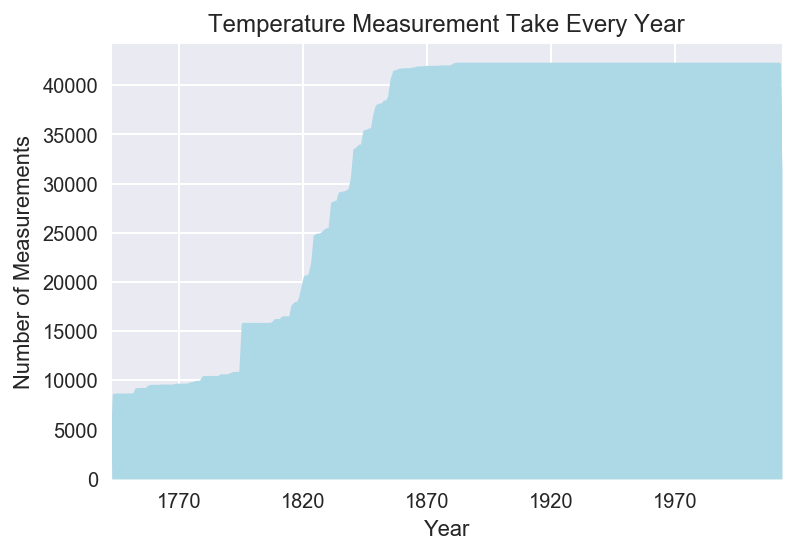

In [24]:
meas_freq = pd.DataFrame(city[['Country','City']])
meas_freq.index.to_datetime()
meas_freq['Measurments'] = 1

meas_freq.resample('A')['Measurments'].sum().plot.area(color='lightblue')
plt.title('Temperature Measurement Take Every Year')
plt.xlabel('Year'); plt.ylabel('Number of Measurements')

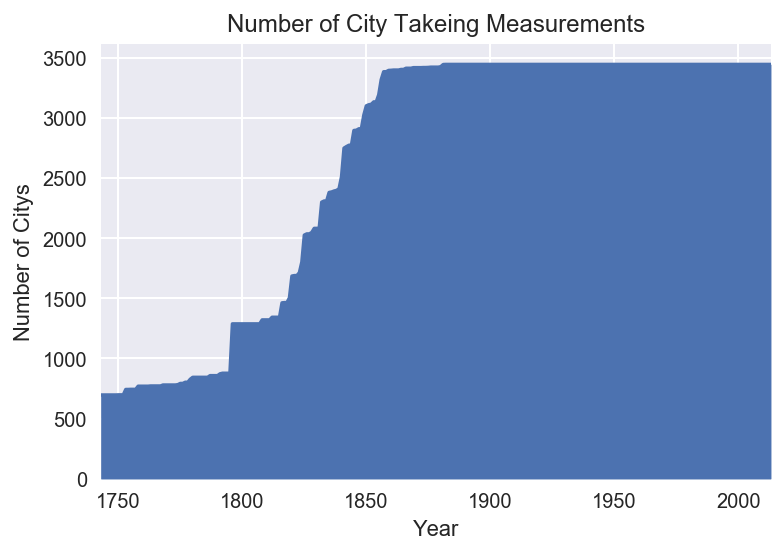

In [25]:
meas_freq['Year'] = meas_freq.index.year
meas_freq.groupby(['Year'])['City'].nunique().plot.area() #nunique() is Returns number of unique elements in the object.
plt.title('Number of City Takeing Measurements')
plt.xlabel('Year'); plt.ylabel('Number of Citys')

### Overall Temperature Change by Sample City

In [27]:
# Selecting a city
sample_city = city['City'].sample(1)[0]
sample_city

temp_sample_city = city[city['City'] == sample_city][['AverageTemperature','AverageTemperatureUpperBound','AverageTemperatureLowerBound']]
temp_growth = city
temp_growth['Year'] = temp_growth.index.year
temp_growth = city.groupby('Year')[['AverageTemperature','AverageTemperatureUpperBound','AverageTemperatureLowerBound']].mean()
temp_growth.plot.line(color=['#820263','#000000','#000000'], 
                           linewidth=1, style=['-', '--', '--'])
plt.title('Average City Temperature by Year (Global)')
plt.ylabel('Average Temperature'); plt.xlabel('Year')                           'AverageTemperatureUpperBound',
                                                      'AverageTemperatureLowerBound']]
temp_sample_city.plot.line(color=['#820263','#000000','#000000'], 
                           linewidth=1, style=['-', '--', '--'])
plt.title('Average Temperature in ' + str(sample_city) )
plt.ylabel('Average Temperature'); plt.xlabel('Year')

SyntaxError: invalid syntax (<ipython-input-27-7f76ac99d6a6>, line 12)

### Vancouver's Overall Temperature Change

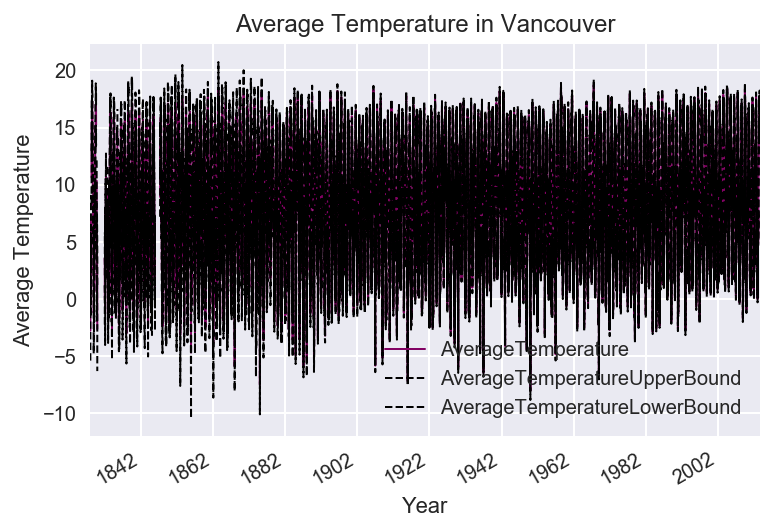

In [28]:
# Selecting a city
sample_city = 'Vancouver'
temp_sample_city = city[city['City'] == sample_city][['AverageTemperature',
                                                      'AverageTemperatureUpperBound',
                                                      'AverageTemperatureLowerBound']]
temp_sample_city.plot.line(color=['#820263','#000000','#000000'], 
                           linewidth=1, style=['-', '--', '--'])
plt.title('Average Temperature in ' + str(sample_city) )
plt.ylabel('Average Temperature'); plt.xlabel('Year')

### Average Change in Temperature Across All Cities

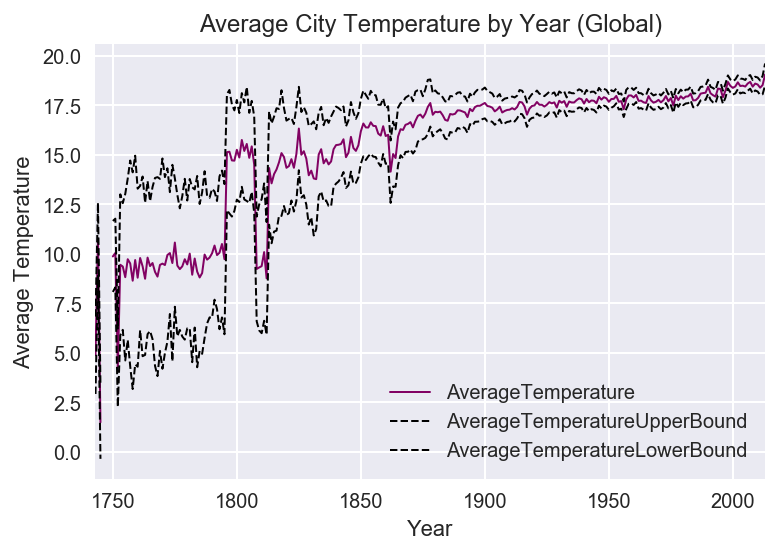

In [29]:
temp_growth = city
temp_growth['Year'] = temp_growth.index.year
temp_growth = city.groupby('Year')[['AverageTemperature','AverageTemperatureUpperBound','AverageTemperatureLowerBound']].mean()
temp_growth.plot.line(color=['#820263','#000000','#000000'], 
                           linewidth=1, style=['-', '--', '--'])
plt.title('Average City Temperature by Year (Global)')
plt.ylabel('Average Temperature'); plt.xlabel('Year')


# <center> Global Temperatures by Major City </center>
### Cleaning Data

In [ ]:
m_city.info()

In [ ]:
# View the dataframe 
m_city.head()

In [ ]:
# Checking null values
m_city.isnull().sum()

### Number of cities that are labelled as 'Major'

In [ ]:
print('Number of Countries Included in Data: ',m_city['Country'].nunique())
print('Number of Cities Included in Data:', m_city['City'].nunique())

### Listing all Major Cities

In [ ]:
m_city['City'].unique()

##  <center> Global Temperatures by State </center>
### Clearning the Data

In [ ]:
state.info()

In [ ]:
state.head()

In [ ]:
# How many countries are included in this dataset
state['Country'].value_counts()

In [ ]:
state_beg = state[state.index == state.index.min()]
state_beg = state_beg.groupby(['Country','State'])[['AverageTemperature','AverageTemperatureUpperBound',
                                    'AverageTemperatureLowerBound']].mean()

In [ ]:
state_end = state[state.index == state.index.max()]
state_end = state_end.groupby(['Country','State'])[['AverageTemperature','AverageTemperatureUpperBound',
                                    'AverageTemperatureLowerBound']].mean()

In [ ]:
# Calculate difference from beginning to now
state_end - state_beg